In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import soundfile
import librosa
import csv
import IPython.display as ipd

# Load csv file

In [2]:
metadata = pd.read_csv('/Users/91954/DATASET/bird_songs_metadata.csv')  # Read csv file 
metadata.head(3)

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav


In [3]:
metadata.shape

(5422, 18)

In [4]:
metadata.isnull().sum()

id               0
genus            0
species          0
subspecies    3876
name             0
recordist        0
country          0
location         0
latitude        90
longitude       90
altitude        42
sound_type       0
source_url       0
license          0
time             0
date             0
remarks       1859
filename         0
dtype: int64

In [5]:
# Drop columns source_url, remarks, license, time, date, recordist and subspecies
metadata.drop(columns=['source_url','remarks','license','time','date', 'recordist', 'subspecies'], inplace=True)

# Rename column names
metadata = metadata.rename(columns={
                                    'id':'File_Id', 'genus':'Genus', 'species':'Species', 'name':'English_Name',
                                    'country':'Country', 'location':'Location', 'latitude':'Latitude',
                                    'longitude':'Longitude', 'altitude':'Altitude', 'location':'Location', 
                                    'sound_type':'Type', 'filename':'Filename'
                                   })
metadata.head(3)

,File_Id,Genus,Species,English_Name,Country,Location,Latitude,Longitude,Altitude,Type,Filename
0,557838,Thryomanes,bewickii,Bewick's Wren,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",557838-0.wav
1,557838,Thryomanes,bewickii,Bewick's Wren,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",557838-1.wav
2,557838,Thryomanes,bewickii,Bewick's Wren,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",557838-4.wav


In [6]:
counts = metadata['Species'].value_counts()
counts

Species
melodia        1256
polyglottos    1182
cardinalis     1074
migratorius    1017
bewickii        893
Name: count, dtype: int64

In [8]:
count = np.max(counts)
count

1256

In [9]:
def species_countplot(plot_data):
    # Create the countplot
    plt.figure(figsize=(8, 4))
    sns.countplot(x='Species', data=plot_data)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=0)  

    # Get bar containers (rects) from the current axes
    bars = plt.gca().containers[0]

    # Get bar labels (counts)
    bar_labels = [x.get_height() for x in bars]
    int_bar_labels = [int(x) for x in bar_labels]

    # Set bar label positions
    plt.bar_label(bars, int_bar_labels)

    # Add title and show the plot
    plt.title('Bird Species Recorded', fontsize=16)
    plt.xlabel('Bird Name', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.show()



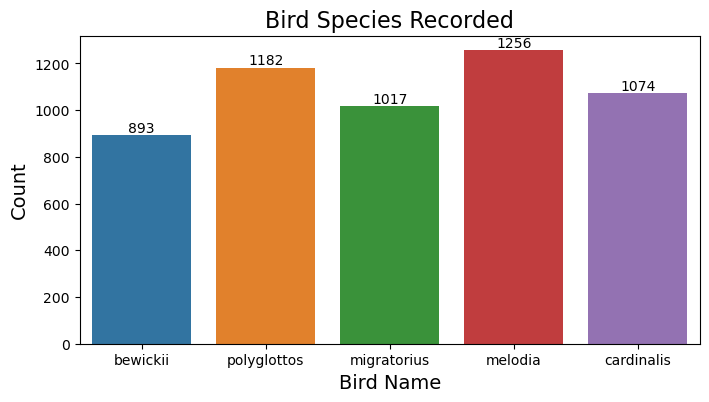

In [10]:
# Plot species count
species_countplot(metadata) 

## Balancing Dataset

In [11]:
# To get the species
species_to_keep = counts.index.tolist()
species_to_keep

['melodia', 'polyglottos', 'cardinalis', 'migratorius', 'bewickii']

In [12]:
# Create a new empty DataFrame
df = pd.DataFrame()

for species in species_to_keep:
  # Sample 500 recordings from the original DataFrame for each species
  sampled_df = metadata[metadata['Species'] == species].sample(500, random_state=42, replace=False)

  # Add the sampled data to the new DataFrame
  df = pd.concat([df, sampled_df], ignore_index=True)

df.head(5)


,File_Id,Genus,Species,English_Name,Country,Location,Latitude,Longitude,Altitude,Type,Filename
0,363142,Melospiza,melodia,Song Sparrow,United States,"Yampa River Botanic Park, Routt Co, Colorado",40.4725,-106.8311,2100,song,363142-0.wav
1,490351,Melospiza,melodia,Song Sparrow,United States,"Hawk Rise Sanctuary (near Linden), Union Coun...",40.6052,-74.2495,0,song,490351-10.wav
2,551290,Melospiza,melodia,Song Sparrow,United States,"Rahway, Union County, New Jersey",40.6061,-74.2772,10,song,551290-10.wav
3,549591,Melospiza,melodia,Song Sparrow,United States,"Thornton Creek Ravine, Seattle, King County, W...",47.7022,-122.3088,60,"adult, sex uncertain, song",549591-9.wav
4,105818,Melospiza,melodia,Song Sparrow,United States,Battelle Darby Metro Park--Darby Dan Training ...,39.9410,-83.2250,267,Song,105818-11.wav


In [13]:
df.shape

(2500, 11)

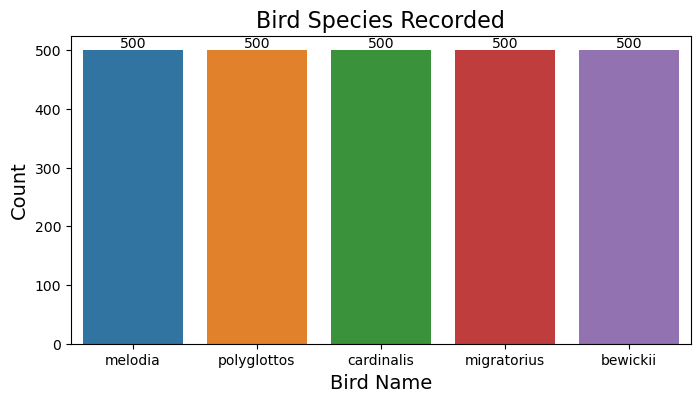

In [14]:
# Plot species count for modified dataframe
species_countplot(df)

#### Save the filtered dataset

In [16]:
df.to_csv('/Users/91954/DATASET/filtered_dataset.csv', index=False)  # Don't save the index as a column

# Audio features visualization

In [17]:
data = pd.read_csv('/Users/91954/DATASET/filtered_dataset.csv')  # Read csv file 
data.head(3)

,File_Id,Genus,Species,English_Name,Country,Location,Latitude,Longitude,Altitude,Type,Filename
0,363142,Melospiza,melodia,Song Sparrow,United States,"Yampa River Botanic Park, Routt Co, Colorado",40.4725,-106.8311,2100,song,363142-0.wav
1,490351,Melospiza,melodia,Song Sparrow,United States,"Hawk Rise Sanctuary (near Linden), Union Coun...",40.6052,-74.2495,0,song,490351-10.wav
2,551290,Melospiza,melodia,Song Sparrow,United States,"Rahway, Union County, New Jersey",40.6061,-74.2772,10,song,551290-10.wav


### Audio features visualization for a single audio

In [18]:
example = df['Filename'].iloc[200]
example

'205806-15.wav'

In [19]:
# Define the path
audio_path = f'/Users/91954/DATASET/wavfiles/{example}'
audio_path

'/Users/91954/DATASET/wavfiles/205806-15.wav'

In [20]:
# Audio display
ipd.display(ipd.Audio(audio_path))

### Soundwave plot

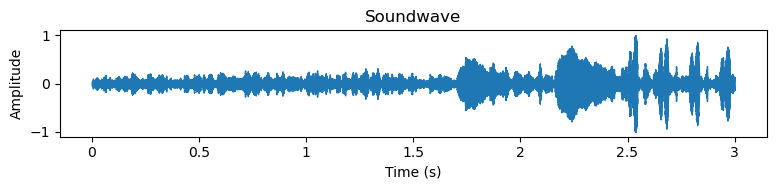

In [21]:
# Load Audio
signal, sr = librosa.load(audio_path)

# Plot sound wave
plt.figure(figsize=(8, 2))
librosa.display.waveshow(signal, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Soundwave')
plt.tight_layout()
plt.show()

### Mel-spectrogram visualization

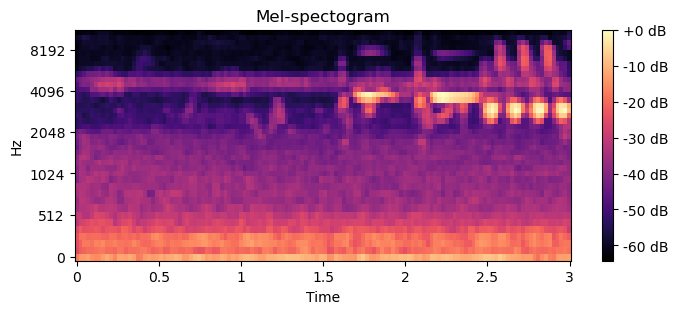

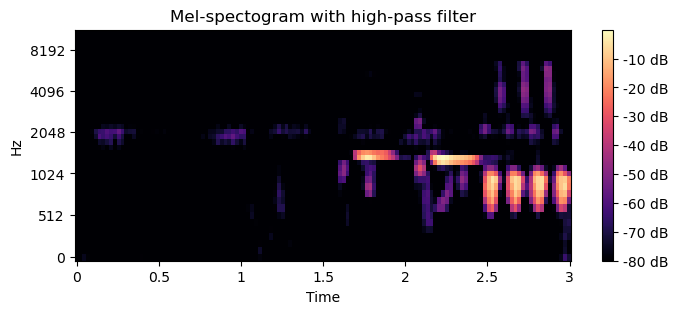

In [22]:
# Plot mel-spectrogram
s = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=40)
                                    
plt.figure(figsize=(8,3))
librosa.display.specshow(librosa.power_to_db(s,ref=np.max), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectogram')
plt.show()


# Plot mel-spectogram with high-pass filter
s = librosa.feature.melspectrogram(y=signal, sr=sr, n_mels=40, fmin=1800)
                                
plt.figure(figsize=(8,3))
librosa.display.specshow(librosa.power_to_db(s**2,ref=np.max), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectogram with high-pass filter')
plt.show()


### Mel-frequency cepstral coefficient (mfcc) visualization

<function matplotlib.pyplot.show(close=None, block=None)>

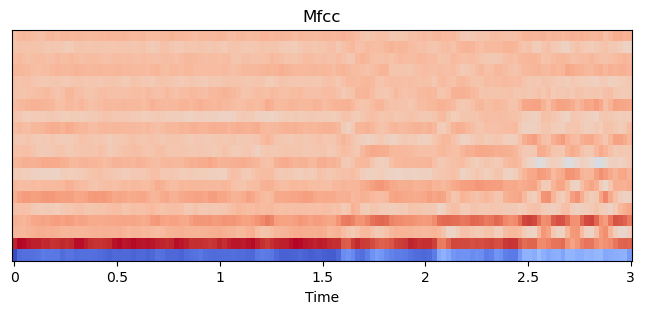

In [23]:
# plot mfcc
plt.figure(figsize=(8,3))
mfcc = librosa.feature.mfcc(y=signal, sr=sr)
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.title('Mfcc')
plt.show

### Spectral bandwidth visualization

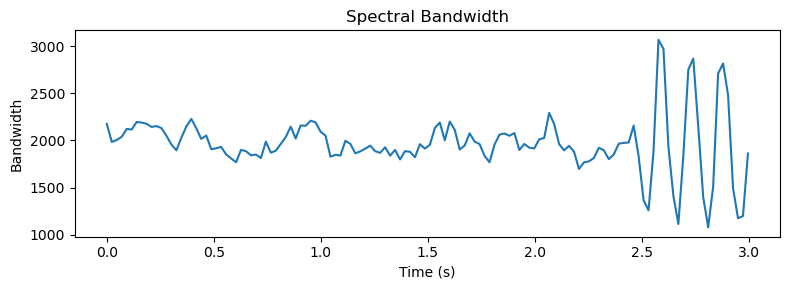

In [24]:
# Spectral bandwidth plot
plt.figure(figsize=(8,3))
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sr)
time = librosa.frames_to_time(np.arange(len(spectral_bandwidth.T)), sr=sr)
plt.plot(time, spectral_bandwidth.T)
plt.title('Spectral Bandwidth')
plt.xlabel('Time (s)')
plt.ylabel('Bandwidth')
plt.tight_layout()
plt.show()

### Spectral centroid visualization

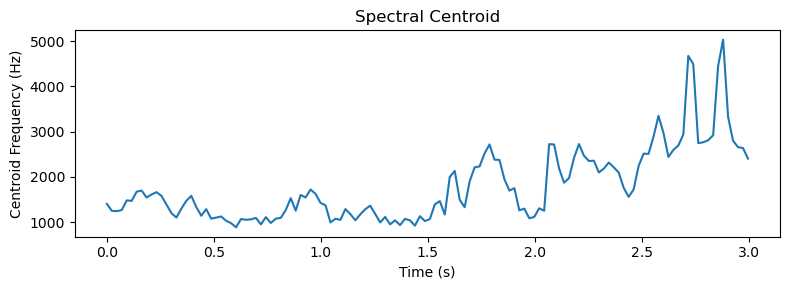

In [25]:
# Spectral centroid plot
plt.figure(figsize=(8,3))
spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sr)
plt.plot(time, spectral_centroid[0])
plt.title('Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Centroid Frequency (Hz)')
plt.tight_layout()
plt.show()

### Root mean square (RMS) visualization

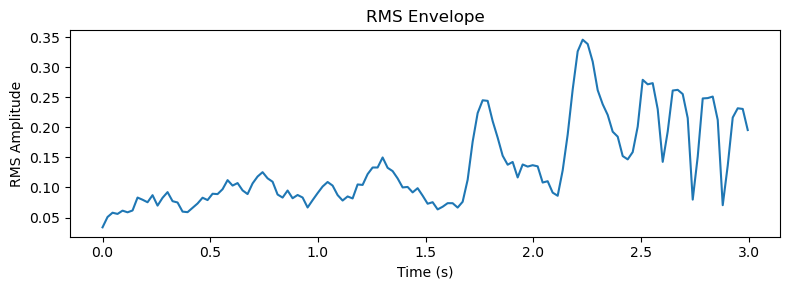

In [26]:
# RMS plot
plt.figure(figsize=(8,3))
rms = librosa.feature.rms(y=signal)
plt.plot(time, rms[0])
plt.title('RMS Envelope')
plt.xlabel('Time (s)')
plt.ylabel('RMS Amplitude')
plt.tight_layout()
plt.show()